In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train_df = pd.read_csv("data/trainingset_2.csv")
df = pd.read_csv('data/boxoffice_dataset.csv', index_col=0, keep_default_na=False)


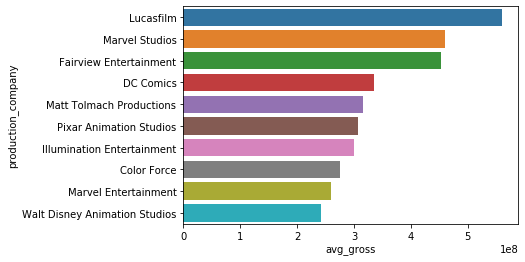

In [13]:
# Production Company and Gross
company_mean_df = df.groupby("production_company")["gross"].mean().reset_index()
company_mean_df = company_mean_df.rename(columns={"gross":"avg_gross"})
company_mean_df = company_mean_df.sort_values("avg_gross", ascending=False)
company_mean_df
sns.barplot(data=company_mean_df.head(10), y="production_company", x="avg_gross");


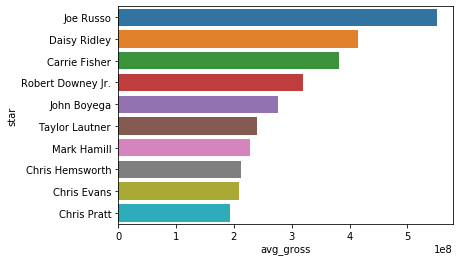

In [14]:
# Star and Gross
df = pd.read_csv("data/boxoffice_dataset_part.csv", index_col=0, keep_default_na=False)
df['stars'] = df['stars'].apply(lambda x: eval(x))
exploded_df = df.explode("stars")
exploded_df = exploded_df.rename(columns={"stars":"star"})

avg_gross_df = exploded_df.groupby("star")["gross"].mean().reset_index()
avg_gross_df = avg_gross_df.rename(columns={"gross":"avg_gross"})
avg_gross_df = avg_gross_df[avg_gross_df.star!=""]
total_gross_df = exploded_df.groupby("star")["gross"].sum().reset_index()
total_gross_df = total_gross_df.rename(columns={"gross":"total_gross"})
total_gross_df = total_gross_df[total_gross_df.star!=""]

merged_df = total_gross_df.merge(avg_gross_df, on="star")
merged_df = merged_df.loc[merged_df.total_gross>1000000000]
sorted_df = merged_df.sort_values(by=["avg_gross"], ascending=False)
sorted_df = sorted_df.reset_index()

sns.barplot(data=sorted_df.head(10), x="avg_gross", y="star");

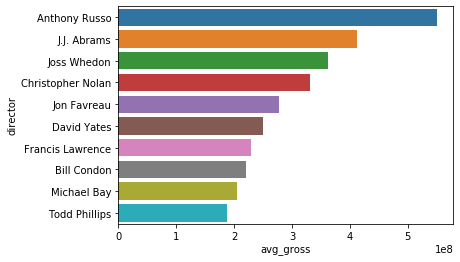

In [15]:
# Director and Gross
avg_gross_df = df.groupby("director")["gross"].mean().reset_index()
avg_gross_df = avg_gross_df.rename(columns={"gross":"avg_gross"})
avg_gross_df = avg_gross_df[avg_gross_df.director!=""]
total_gross_df = df.groupby("director")["gross"].sum().reset_index()
total_gross_df = total_gross_df.rename(columns={"gross":"total_gross"})
total_gross_df = total_gross_df[total_gross_df.director!=""]

merged_df = total_gross_df.merge(avg_gross_df, on="director")
merged_df = merged_df.loc[merged_df.total_gross>1000000000]
sorted_df = merged_df.sort_values(by=["avg_gross"], ascending=False)
sorted_df = sorted_df.reset_index()

sns.barplot(data=sorted_df.head(10), y="director", x="avg_gross");